In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [66]:
data = pd.read_csv('dados.csv')
data['Tempo'] = [float(x)*10**-6 for x in data['Tempo']]
data.head()

,Tempo,Velocidade RPM
0,0.000044,0.0
1,0.000472,0.0
2,0.000952,0.0
3,0.001444,0.0
4,0.001968,0.0


In [67]:
# Valores máximo original e desejado
max_original = 4110
max_desejado = 3831

# Calcular a constante de escala
constante_de_escala = max_desejado / max_original
print(f'Constante de Escala: {constante_de_escala}')


Constante de Escala: 0.9321167883211678


In [68]:
# Ajustar as amostras
data['amostra_ajustada'] = data['Velocidade RPM'] * constante_de_escala

# Exibir as primeiras linhas do DataFrame ajustado para verificar
display(data)
data.to_csv('dados_step_ajustado.csv', index=False)


,Tempo,Velocidade RPM,amostra_ajustada
0,0.000044,0.00,0.000000
1,0.000472,0.00,0.000000
2,0.000952,0.00,0.000000
3,0.001444,0.00,0.000000
4,0.001968,0.00,0.000000
...,...,...,...
434,7.484072,4087.52,3810.046015
435,7.501752,4055.43,3780.134387
436,7.519424,4057.27,3781.849482
437,7.537104,4072.40,3795.952409


In [69]:
indices = np.arange(len(data['Tempo']))

In [70]:
tempo = data['Tempo']
resposta = data['amostra_ajustada']
print(resposta.max())

3831.5406277372263


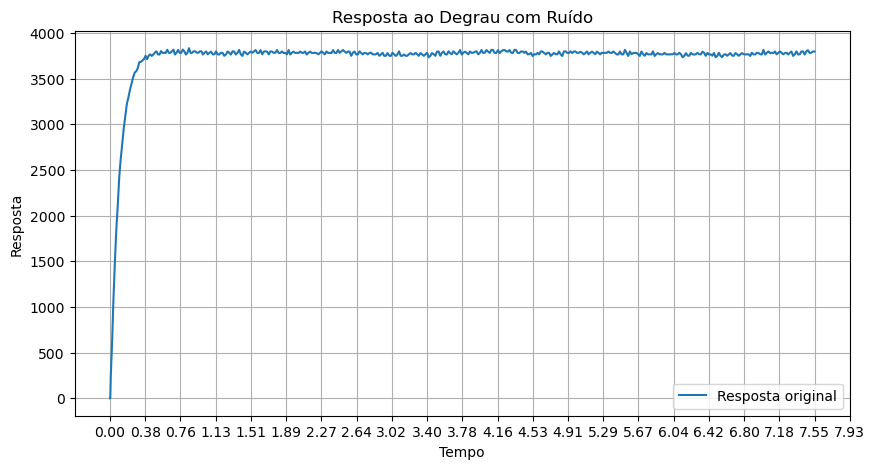

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(tempo, resposta, label='Resposta original')
plt.xlabel('Tempo')
plt.ylabel('Resposta')

plt.gca().xaxis.set_major_locator(MultipleLocator((tempo.max() - tempo.min()) / 20))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Resposta ao Degrau com Ruído')
plt.grid()
plt.legend()
plt.show()

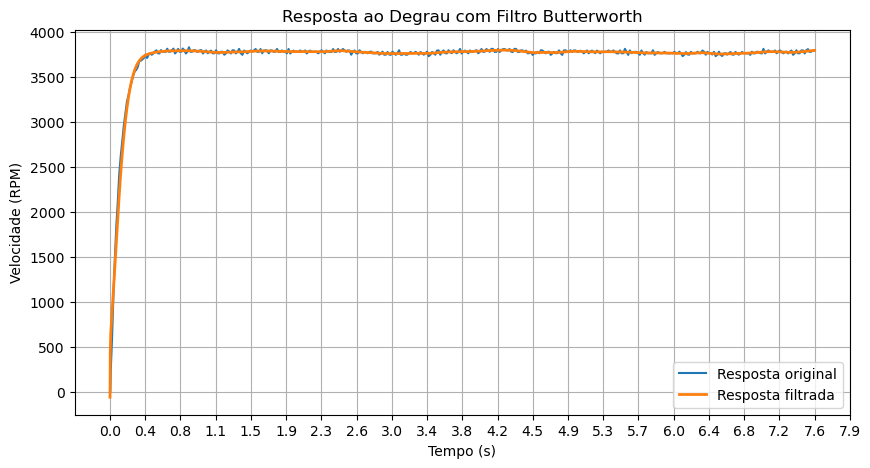

In [72]:
# Definir a frequência de corte e a ordem do filtro
freq_de_corte = 0.1  # Ajuste conforme necessário
ordem = 2

# Obter os coeficientes do filtro Butterworth
b, a = butter(ordem, freq_de_corte, btype='low', analog=False)

# Aplicar o filtro aos dados
resposta_filtrada = filtfilt(b, a, resposta)

# Plotar a resposta filtrada
plt.figure(figsize=(10, 5))
plt.plot(tempo, resposta, label='Resposta original')
plt.plot(tempo, resposta_filtrada, label='Resposta filtrada', linewidth=2)
plt.gca().xaxis.set_major_locator(MultipleLocator((tempo.max() - tempo.min()) / 20))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (RPM)')
plt.title('Resposta ao Degrau com Filtro Butterworth')
plt.grid()
plt.legend()
plt.show()
